# Probability

In [10]:
import enum, random

class Kid(enum.Enum):
    BOY = 0
    GIRL = 1

def random_kid() -> Kid:
    return random.choice([Kid.BOY,Kid.GIRL])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)

for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == Kid.GIRL:
        older_girl += 1
    if older == Kid.GIRL and younger == Kid.GIRL:
        both_girls += 1 
    if older == Kid.GIRL or younger == Kid.GIRL:
        either_girl += 1


print(f"P(both | older): {both_girls / older_girl}")
print(f"P(both | either): {both_girls / either_girl}")

P(both | older): 0.5007089325501317
P(both | either): 0.3311897106109325


## Continuous distributions

In [11]:
# probability densityu function
def uniform_pdf(x: float)-> float:
    return 1 if 0 <= x else 0


In [12]:
# cumulative distribution function
def uniform_cdf(x:float) -> float:
    """Returns the probability that a uniform random variable is <= x"""
    if x < 0: return 0
    elif x < 1: return x
    else: return 1

## Normal Distribution

The normal distribution is the classic bell curve–shaped distribution and is com‐
pletely determined by two parameters: its mean μ (mu) and its standard deviation σ
(sigma). The mean indicates where the bell is centered, and the standard deviation
how “wide” it is

In [13]:
#  pdf implemented

import math

SQRT_TWO_PI = math.sqrt(2 * math.pi)

def normal_pdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (math.exp(-(x - mu) ** 2 / 2 / sigma ** 2) / (SQRT_TWO_PI * sigma))

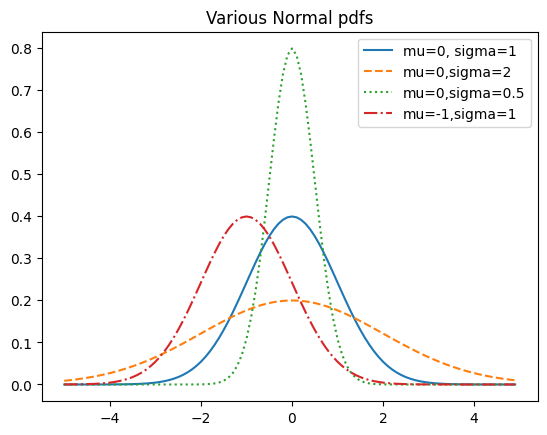

In [14]:
import matplotlib.pyplot as plt

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x,sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

In [15]:
# The CDF for the normal distribution cannot be written in an “elementary” manner,
# but we can write it using Python’s math.erf error function:

def normal_cdf(x: float, mu: float = 0, sigma: float =1) -> float:
    return (1 + math.erf((x-mu) /math.sqrt(2) / sigma)) / 2 

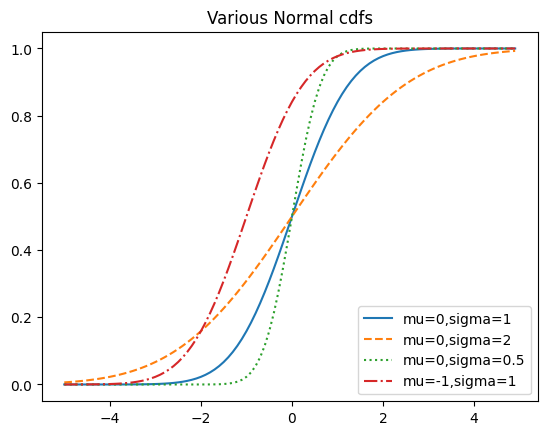

In [16]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend(loc=4) # bottom right
plt.title("Various Normal cdfs")
plt.show()

In [17]:
# Sometimes we’ll need to invert normal_cdf to find the value corresponding to a
# specified probability. There’s no simple way to compute its inverse, but normal_cdf is
# continuous and strictly increasing, so we can use a binary search

def inverse_normal_cdf(p: float, mu:float = 0, sigma: float = 1, tolerance: float = 0.00001) -> float:
    """Find approximate inverse using binary search"""
    # if not standard, compute standard and resolute
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance)

    low_z = -10 # normal_cdf(-10) is (very close to) 0
    hi_z = 10 # normal_cdf(10) is (very close to) 1

    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) /2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            low_z = mid_z
        else: 
            hi_z = mid_z
    
    return mid_z

# The function repeatedly bisects intervals until it narrows in on a Z that’s close enough to the desired probability

## Central limit Theorem

One reason the normal distribution is so useful is the central limit theorem, which
says (in essence) that a random variable defined as the average of a large number of
independent and identically distributed random variables is itself approximately nor‐
mally distributed.

In [18]:
def bernoulli_trial(p: float) -> int:
    """Returns 1 with probability p and 0 with probability 1-p"""
    return 1 if random.random() < p else 0

In [19]:
def binomial(n: int, p: float) -> int:
    """Returns the sum of n bernoulli(p) trials"""
    return sum(bernoulli_trial(p) for _ in range(n))

In [20]:
from collections import Counter

def binomial_histogram(p: float,  n:int, num_points: int) -> None:
    """Picks points from a Binomial(n, p) and plots their histogram"""
    data = [binomial(n, p) for _ in range(num_points)]

    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()], [v /num_points for v in histogram.values()], 0.8, color='0.75')

    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))

    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
    for i in xs]
    plt.plot(xs,ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()

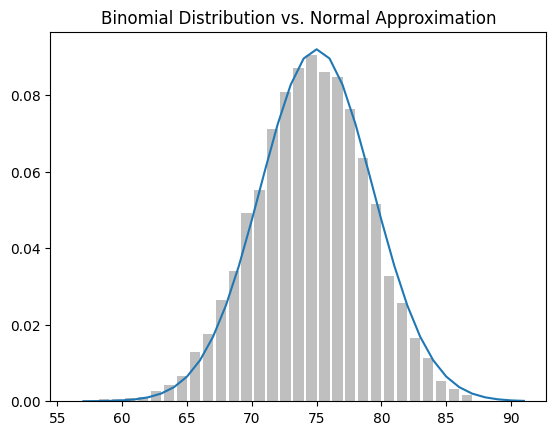

In [39]:
binomial_histogram(0.75, 100, 10000)